In [1]:
%matplotlib inline

In [2]:
from galsize_models.models.kravtsov13 import halo_radius_vs_stellar_mass
from galsize_models.models.universal_alpha import component_size_vs_rhalo
from halotools.empirical_models import Moster13SmHm
from astropy.cosmology import Planck15

def halo_mass_from_stellar_mass(mstar_planck15, cosmology=Planck15, **kwargs):
    mstar_unity_h = mstar_planck15*cosmology.h*cosmology.h
    smhm_model = Moster13SmHm()
    for key in kwargs.keys():
        if key in list(smhm_model.param_dict.keys()):
            smhm_model.param_dict[key] = kwargs[key]
    logmhalo_unity_h_abscissa = np.linspace(10, 15, 1000)
    sm_unity_h_abscissa = smhm_model.mean_stellar_mass(prim_haloprop=10**logmhalo_unity_h_abscissa)
    result_unity_h = 10**np.interp(np.log10(mstar_planck15), 
                     np.log10(sm_unity_h_abscissa), logmhalo_unity_h_abscissa)
    result_planck15 = result_unity_h/cosmology.h
    return result_planck15

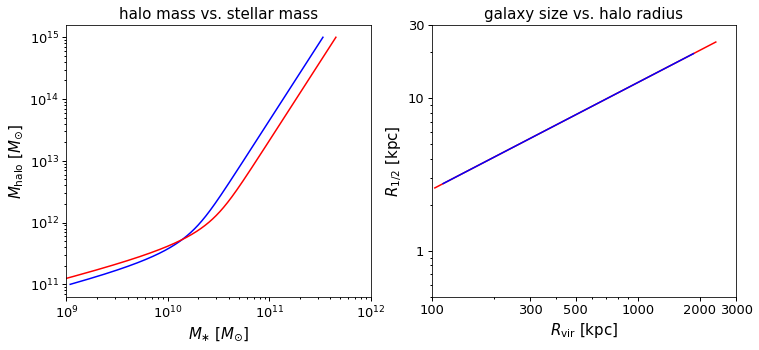

In [3]:

sm_abscissa = np.logspace(8.5, 11.75, 100)

norm_model1, alpha_model1 = 0.1, 0.7
m10_model1 = 11.59
rhalo_model1 = halo_radius_vs_stellar_mass(sm_abscissa)
rhalf_model1 = component_size_vs_rhalo(rhalo_model1, norm_model1, alpha_model1)

norm_model2, alpha_model2 = 0.1, 0.7
m10_model2 = 11.8
rhalo_model2 = halo_radius_vs_stellar_mass(sm_abscissa, m10=m10_model2)
rhalf_model2 = component_size_vs_rhalo(rhalo_model2, norm_model2, alpha_model2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

__=ax2.loglog()
__=ax1.loglog()

__=ax2.plot(rhalo_model1, rhalf_model1, color='red')
__=ax2.plot(rhalo_model2, rhalf_model2, color='blue')

mhalo_array = np.logspace(11, 15, 1000)

smhm_model = Moster13SmHm()
smhm_model.param_dict['m10'] = m10_model1
__=ax1.plot(smhm_model.mean_stellar_mass(prim_haloprop=mhalo_array), mhalo_array, 
           color='blue')

smhm_model.param_dict['m10'] = m10_model2
__=ax1.plot(smhm_model.mean_stellar_mass(prim_haloprop=mhalo_array), mhalo_array, 
           color='red')

xlim1 = ax2.set_xlim(100, 3000)
ylim1 = ax2.set_ylim(0.5, 30)
__=ax2.set_xticks((100, 300, 500, 1000, 2000, 3000))
__=ax2.set_yticks((1, 10, 30))
from matplotlib import ticker
__=ax2.get_xaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax2.get_xaxis().set_minor_formatter(ticker.NullFormatter())
__=ax2.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
__=ax2.get_yaxis().set_minor_formatter(ticker.NullFormatter())

xlabel1 = ax2.set_xlabel(r'$R_{\rm vir}$ [kpc]')
ylabel1 = ax2.set_ylabel(r'$R_{1/2}$ [kpc]')
title1 = ax2.set_title('galaxy size vs. halo radius')

xlim2 = ax1.set_xlim(1e9, 1e12)
xlabel2 = ax1.set_xlabel(r'$M_{\ast}$ $[M_{\odot}]$')
ylabel2 = ax1.set_ylabel(r'$M_{\rm halo}$ $[M_{\odot}]$')
title2 = ax1.set_title('halo mass vs. stellar mass')
